In [1]:
%run style_and_packages.ipynb

# Beispiel: Impulssatz

## Aufgabenstellung


@fig-ems_impuls_system zeigt das System eines Stahlrahmens. Dieser wird durch eine kurzzeitig einwirkende Stossbelastung $F(t)$ in Höhe des Rahmenriegels beansprucht.

![System des Stahlramens mit kurzzeitig einwirkender Stossbelastung](bilder/aufgabe_ems_impuls.svg){#fig-ems_impuls_system}


Gesucht:

- Der Maximalwert der zu erwartenden Riegelauslenkung (näherungsweise)
- Darstellung des zeitlichen Verlaufs $u(t)$ in einem Diagramm
- Nachweis der Elastizität des Systems anhand der Rückstellkraft (Spannungsnachweis mit Fliessspannung $f_y$ als Grenze)
  
Gegeben:

- Lastfunktion gemäss @fig-ems_impuls_lastfunktion

In [2]:
params_not_relevant = {
    'EA_riegel':sp.oo,
    'EI_riegel':sp.oo,
    'EA_stuetze':sp.oo,
}

# render.dict_render(params_not_relevant)

In [3]:
params = {              
          'EI_stuetze':23646000.0*unit.N*unit.m**2,
          'm_tot':5000.0*unit.N*unit.second**2/unit.m,
          'W_el_y':938.0*10**3*unit.mm**3,
          'H':3000.0*unit.mm,
          'F_max':1000.0*10**3*unit.N,
          't_1':0.003*unit.second,
          't_2':0.006*unit.second,
          'f_y':355.0*unit.N/unit.mm**2,
          'u_0':0.0
          }

params_plot = convert.param_value(params)


In [4]:
#| label: tbl-parameter_impuls
#| tbl-cap: Parameter der Aufgabenstellung

params_tot = params.copy()
params_tot.update(params_not_relevant)



render.dict_to_table(params_tot)


|   |   |
|---|---|
| $EA_{riegel} = \infty$ | $EA_{stuetze} = \infty$ |
| $EI_{riegel} = \infty$ | $EI_{stuetze} = 23646000.0 \text{m}^{2} \text{N}$ |
| $F_{max} = 1000000.0 \text{N}$ | $H = 3000.0 \text{mm}$ |
| $W_{el y} = 938000.0 \text{mm}^{3}$ | $f_{y} = \frac{355.0 \text{N}}{\text{mm}^{2}}$ |
| $m_{tot} = \frac{5000.0 \text{N} \text{s}^{2}}{\text{m}}$ | $t_{1} = 0.003 \text{s}$ |
| $t_{2} = 0.006 \text{s}$ | $u_{0} = 0.0$ |


In [5]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m_tot,  H, f_y, t, F_max, t_1, t_2,W_el_y = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze,  m_tot, H, f_y, t, F_max, t_1, t_2 W_el_y')


u = sp.Function('u')(t)

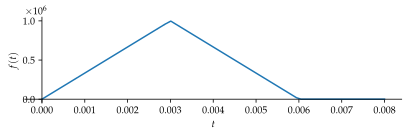

In [6]:
#| label: fig-ems_impuls_lastfunktion
#| fig-cap: "Lastfunktion der kurzzeitig einwirkenden Stossbelastung"




F_1 = t*F_max / t_1 
F_2 =  F_1.subs(t,t_1)-((t-t_1)*F_max / t_1)
F_t = sp.Piecewise((F_1,t<t_1), (F_2,t<=t_2), (0, t>t_2))
p_last = sp.plot(F_t.subs(params_plot), (t,0,0.008), size=(5.9,2))



{{< pagebreak >}}

## Musterlösung

### Horizontale Steifigkeit

Für entsprechende Anwendungsfälle gibt es fertige Lösungen zur Bestimmung der Steifigkeit. Gemäss @fig-ems_impuls_system ist die Stütze am Fuss- und Kopfpunkt eingespannt (Änderungen der Lagerung beeinflussen die Steifigkeit!). Somit resultiert die Steifigkeit zu:

$$
k_{Stuetze} = \frac{12EI_{Stuetze}}{H^3}
$${#eq-ems_impuls_k_fur_stuetze}

Diese gilt für eine einzelne Stütze. Angewendet auf das Beispiel folgt die Systemsteifigkeit zu:


In [7]:
k = 2 * 12 * EI_stuetze / H**3

render.eq_display('k_', k,
                  'k_', k.subs(params).simplify().evalf(3))

    24⋅EI_stuetze
k = ─────────────
           3     
          H      

    2.1e+7⋅newton
k = ─────────────
        meter    

### Eigenkreisfrequenz

In [8]:
omega_n = sp.sqrt(k/m_tot)

render.eq_display('omega_n', 'sqrt(k/m)',
                  'omega_n', omega_n,
                  'omega_n', omega_n.subs(params).simplify().evalf(3))

         ___
        ╱ k 
ωₙ =   ╱  ─ 
     ╲╱   m 

               ____________
              ╱ EI_stuetze 
ωₙ = 2⋅√6⋅   ╱  ────────── 
            ╱     3        
          ╲╱     H ⋅mₜₒₜ   

      64.8 
ωₙ = ──────
     second

### Bewegungsgleichung

Die Bewegungsgleichung für einen ungedämpften Einmassenschwinger ist die folgende:

$$
m u(t)'' + k u(t) = F(t)
$${#eq-ems_impuls_bewegungsgleichung}


#### Approximation der Lösung

Es handelt sich um eine inhomogene Differentialgleichung 2.Ordnung. Auf die exakte Lösung der Gleichung wird nicht eingegangen. Es wird versucht die bemessungsrelevanten Parameter näherungsweise zu bestimmen. Dies lässt sich mit dem Impulssatz approximieren. 

$$
F \Delta t = m \Delta v
$${#eq-ems_impuls_impulssatz}

Dieser besagt, dass die einwirkende Kraft $F$ im betrachteten Zeitabschnitt $\Delta t$ der Masse $m$ multipliziert mit der Geschwindigkeitsänderung $\Delta v$ des Objekts entspricht. Für eine kurze Anregung, wie im Beispiel der Fall ist, kann die Anfangsgeschwindigkeit wie folgt bestimmt werden:

$$
v_0 = \frac{I}{m}
$${#eq-ems_impuls_v0}

$$
I = \int_{0}^{t_2} F(t) \,dt
$${#eq-ems_impuls_intensitaet}

In [9]:
I = sp.integrate(F_t.subs(params), (t,0,t_2.subs(params)))
v_0 = I / m_tot

## Die Anfangsgeschwindigkeit wird zum Params dict hinzugefügt
params['v_0'] = v_0.subs(params)
params_plot = convert.param_value(params)


render.eq_display('I_', I,
                  'v_0', v_0,
                  'v_0', v_0.subs(params))

I = 3000.0⋅newton⋅second

     3000.0⋅newton⋅second
v₀ = ────────────────────
             mₜₒₜ        

     0.6⋅meter
v₀ = ─────────
       second 

Durch die Impuls-Betrachtung vereinfacht sich die Bewegungsgleichung zu:


$$
m u(t)'' + k u(t) = 0
$${#eq-ems_impuls_bewegungsgleichung_homogen_ungedaempft}

Mit der Anfangsgeschwindigkeit als Randbedingung. 

$$
u'(t=0) = v_0  
$${#eq-ems_impuls_r1}

und der Startauslenkung:

$$
u(t=0) = u_0 = 0 
$${#eq-ems_impuls_r2}

Kann mittels der folgenden Ansatzfunktion die homogene Differentialgleichung gelöst werden:

$$
u(t) = A_1 \cos(\omega_n t) + A_2 \sin(\omega_n t)
$${#eq-ems_impuls_ansatz_beweg}


In [10]:
A_1, A_2,u_0, v_0 = sp.symbols('A_1:3 u_0 v_0')

bewegungsgleichung = m_tot*sp.diff(u,t,2) + k*u
ansatzfunktion = sp.Eq(u,A_1 * sp.cos(omega_n*t) + A_2*sp.sin(omega_n*t))
eq_randbedingung_1 = sp.Eq(u_0,ansatzfunktion.rhs.subs(t,0))
eq_randbedingung_2 = sp.Eq(v_0, sp.diff(ansatzfunktion.rhs,t).subs(t,0))
A_solve = sp.solve([eq_randbedingung_1, eq_randbedingung_2],[A_1, A_2],dict=True)[0]


u_t = ansatzfunktion.subs(A_solve)
render.eq_display('u(t)',u_t.rhs.subs(params).simplify().evalf(3))


                  ⎛16.7406358567675⋅√15⋅t⎞      
u(t) = 0.00925⋅sin⎜──────────────────────⎟⋅meter
                  ⎝        second        ⎠      

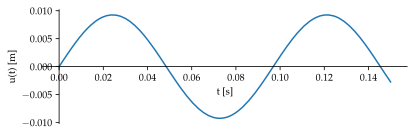

In [11]:
#| label: fig-ems_impuls_bewegungsfunk
#| fig-cap: "Zeitlicher Verlauf der Auslenkung"

u_t_plot = u_t.subs(params_plot).rhs
plot_beweg=sp.plot(u_t_plot, (t,0,0.15), ylabel='u(t) [m]',xlabel='t [s]',size=(5.9,2))



### Rückstellkraft

Anhand der maximalen Amplitude lässt sich die maximale Rückstellkraft für den gesamten Rahmen bestimmen.

$$
F_R = k   u = k   A
$${#eq-ems_impuls_rueckstellkraft}



In [12]:
t_max = sp.solve(sp.Eq(sp.diff(u_t.rhs,t),0),t)
u_max = u_t.subs(t, t_max[0].subs(params_plot)*unit.second).subs(params).rhs

F_R = k * u_max

render.eq_display('u_max', 'A',
                  'A', u_max.simplify().evalf(3),
                  'F_R', F_R.subs(params).simplify().evalf(3))

uₘₐₓ = A

A = 0.00925⋅meter

F_R = 1.95e+5⋅newton

#### Spannungsnachweis

Die Rückstellkraft wirkt im Zentrum der Masse und bewirkt das maximale Biegemoment bei den Fusspunkten.

![Biegemomentenverlauf durch die statische Ersatzkraft](bilder/impulssatz_momentenverlauf.svg)

In [13]:
M_max = F_R/2 * H * sp.Rational(0.5)

sigma_max = M_max /W_el_y

render.eq_display('M_max', 'F_R /2 * H * Rational(0.5)',
                  'M_max', M_max.subs(params).simplify().evalf(3),
                  'sigma_max', 'M_max / W_el_y',
                  'sigma_max', unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm),
                  sp.Symbol('\\text{Nachweis}'), unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm)<f_y,
                  sp.Symbol('\\text{Nachweis}'), unit.convert_to(sigma_max.subs(params).simplify().evalf(3), unit.mm)<f_y.subs(params))

       F_R⋅H
Mₘₐₓ = ─────
         4  

Mₘₐₓ = 1.46e+5⋅meter⋅newton

        Mₘₐₓ 
σₘₐₓ = ──────
       W_el_y

       156.0⋅newton
σₘₐₓ = ────────────
                 2 
       millimeter  

                  156.0⋅newton      
\text{Nachweis} = ──────────── < f_y
                            2       
                  millimeter        

\text{Nachweis} = True